In [1]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [2]:
def f(x): return 3*x**2+2*x+1

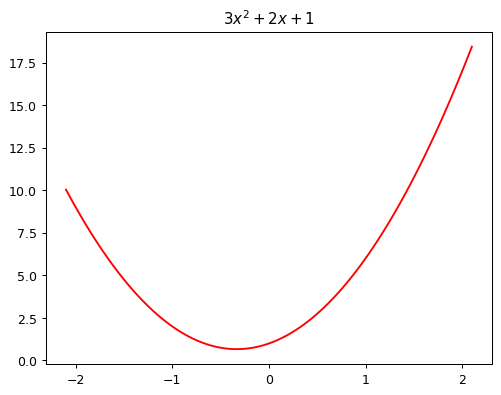

In [3]:
plot_function(f, "$3x^2 + 2x + 1$")

In [4]:
def quad(a, b, c, x): return a*x**2+b*x+c

In [5]:
from functools import partial

In [6]:
def mk_quad(a,b,c): return partial(quad, a,b,c)


In [7]:
@interact(a=3,b=2,c=1)
def my_quad(a,b,c):
    f = mk_quad(a,b,c)
    plot_function(f)

interactive(children=(IntSlider(value=3, description='a', max=9, min=-3), IntSlider(value=2, description='b', …

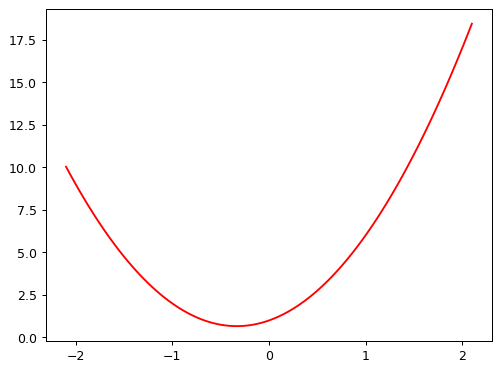

In [8]:
plot_function(f)

In [9]:
from numpy.random import normal,seed, uniform 

In [10]:
np.random.seed(42)

In [11]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)


In [12]:
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

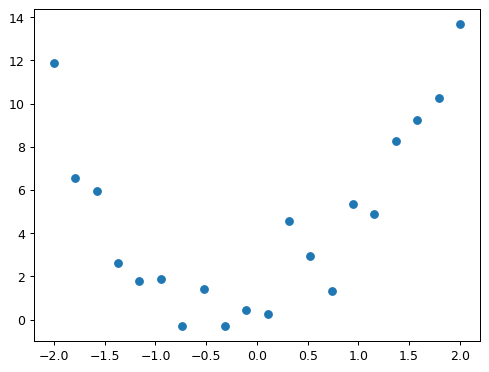

In [13]:
plt.scatter(x,y)

In [14]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [15]:
def mae(pred, actual): return (torch.abs(pred-actual)).mean()

In [24]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,13), title="MSE: {}".format(loss))

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [26]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y) 

In [28]:
quad_mae([1.5,1.5,1.5])

tensor(1.7041, dtype=torch.float64)

In [36]:
# rank 1 tensor
abc = torch.tensor([1.5,1.5,1.5])
abc.requires_grad_()

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [37]:
loss=quad_mae(abc)

In [38]:
loss

tensor(1.7041, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [39]:
loss.backward()

In [45]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [48]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
print(f'loss:{loss:.2f}')

loss:2.36


In [59]:
abc = torch.tensor([1.1,1.1,1.1])
abc.requires_grad_()
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.1
    print(f'Step #{i} Loss: {loss:.4f}')
print(abc)

Step #0 Loss: 2.4219
Step #1 Loss: 2.2137
Step #2 Loss: 1.8164
Step #3 Loss: 1.4035
Step #4 Loss: 1.1613
Step #5 Loss: 1.5542
Step #6 Loss: 1.9741
Step #7 Loss: 2.2343
Step #8 Loss: 2.1990
Step #9 Loss: 1.8685
tensor([3.1496, 1.5042, 0.9600], requires_grad=True)


In [61]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y,0.)

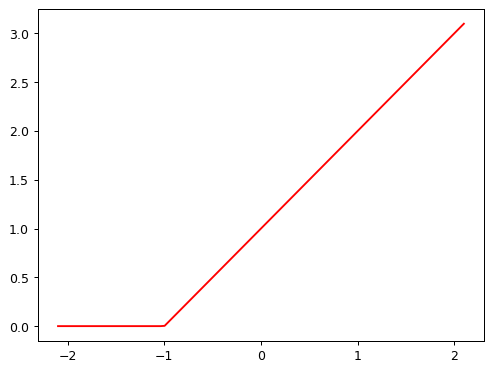

In [63]:
plot_function(partial(rectified_linear,1,1))

In [70]:
@interact(m=1,b=1)
def plot_relu(m,b):
    plot_function(partial(rectified_linear,m,b),ylim=(-5,10))

interactive(children=(IntSlider(value=1, description='m', max=3, min=-1), IntSlider(value=1, description='b', …

In [71]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

In [72]:
@interact(m1=1.5,b1=1.5,m2=1.5,b2=1.5)
def plot_double_relu(m1,b1,m2,b2):
    return plot_function(partial(double_relu,m1,b1,m2,b2))

interactive(children=(FloatSlider(value=1.5, description='m1', max=4.5, min=-1.5), FloatSlider(value=1.5, desc…

# Triple Relu 

In [73]:
def triple_relu(m1,b1,m2,b2,m3,b3,x):
    return rectified_linear(m1,b1,x)+rectified_linear(m2,b2,x)+rectified_linear(m3,b3,x)
    

In [76]:
@interact(m1=-2,b1=-2,m2=-1,b2=-1,m3=2,b3=2)
def plot_triple_relu(m1,b1,m2,b2,m3,b3):
    plt.scatter(x,y)
    plot_function(partial(triple_relu,m1,b1,m2,b2,m3,b3))

interactive(children=(IntSlider(value=-2, description='m1', max=2, min=-6), IntSlider(value=-2, description='b…